Q 1 Give an example where you can apply the Apriori algorithm.      
Apriori algorithm is an efficient algorithm that scans the database and helps in reducing the size of the itemsets in the database considerably providing a good performance. Thus, data mining helps consumers and industries better in the decision-making process. Currently there are lot of applications and industry which uses apriori algorithm but one of the most famous is Amazon, Flipkar. There recommendation system works using apriori algorithm.

When we visit to these websites crawlers make association rules and based on that recommends us product within a specific range. It helps in providing better customer experience.

Q 2  What happens when we decrease the support level? Why?     

Support level signifies the number of times an item is purchase out of total numbe of transactions. So it tells the demand of any product. 
If support level is increase from previous support level then it means that demand of an item is increase. 
If support level is decrease from the previous support level of that item that means demand of that item decreases.

It happens when a new or better product is enter in the market or there is huge increment in the price of that product.

Q  3 What happens when we increase the confidence level? Why?   

Confidence level signifies the favourable chances of purchasing of Item2 when Item1 is purchased.
As the confidence level increases that means the chances of purchasing of item2 due to item1 is increasing. This helps any seller to increase the sale and revenue after finding the association between multiple items.

In [54]:
#@author Shivam Singhal
import pandas
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
import itertools
import time
import operator
%matplotlib inline
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [55]:
df = pandas.read_csv('BreadBasket_DMS.csv')
df.drop(df[df['Item']=='NONE'].index, inplace=True)
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [56]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pandas.DataFrame(te_ary, columns=te.columns_)

Rules for  10  % confidence level are  4
Rules for  20  % confidence level are  2
Rules for  30  % confidence level are  1
Rules for  40  % confidence level are  1
Rules for  50  % confidence level are  1
Rules for  60  % confidence level are  0
Rules for  70  % confidence level are  0
Rules for  80  % confidence level are  0
Rules for  90  % confidence level are  0


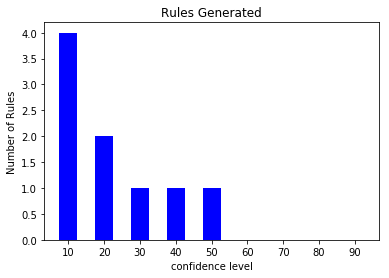

In [57]:
#4.     How many rules are generated with a support level of 5% and a confidence level of 90%, 80%, 70%, 60%, 50%, 40%, 30%, 20%, 10%? 
#Also visualized the generated rules.


frequent_itemsets = apriori(df2, min_support=0.05, use_colnames=True)
x=[10,20,30,40,50,60,70,80,90]
y=[]
for i in range(1,10):
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=i*0.1)
    y.append(len(rules))
    
for i in range(0,9):
    print('Rules for ',x[i],' % confidence level are ',y[i])
    
plt.bar(x, y, tick_label = x, width = 5, color = ['blue']) 
plt.xlabel('confidence level') 
plt.ylabel('Number of Rules') 
plt.title('Rules Generated') 
plt.show() 

Rules for  10  % confidence level are  44
Rules for  20  % confidence level are  31
Rules for  30  % confidence level are  19
Rules for  40  % confidence level are  16
Rules for  50  % confidence level are  11
Rules for  60  % confidence level are  1
Rules for  70  % confidence level are  1
Rules for  80  % confidence level are  0
Rules for  90  % confidence level are  0


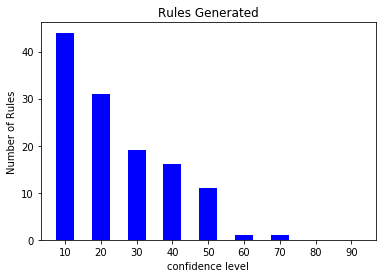

In [58]:
#5.     How many rules are generated with a support level of 1% and a confidence level of 90%, 80%, 70%, 60%, 50%, 40%, 30%, 20%, 10%? 
#Also visualized the generated rules.

frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
x=[10,20,30,40,50,60,70,80,90]
y=[]
for i in range(1,10):
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=i*0.1)
    y.append(len(rules))
    
for i in range(0,9):
    print('Rules for ',x[i],' % confidence level are ',y[i])
    
plt.bar(x, y, tick_label = x, width = 5, color = ['blue']) 
plt.xlabel('confidence level') 
plt.ylabel('Number of Rules') 
plt.title('Rules Generated') 
plt.show() 

Rules for  10  % confidence level are  103
Rules for  20  % confidence level are  57
Rules for  30  % confidence level are  35
Rules for  40  % confidence level are  25
Rules for  50  % confidence level are  17
Rules for  60  % confidence level are  4
Rules for  70  % confidence level are  2
Rules for  80  % confidence level are  1
Rules for  90  % confidence level are  0


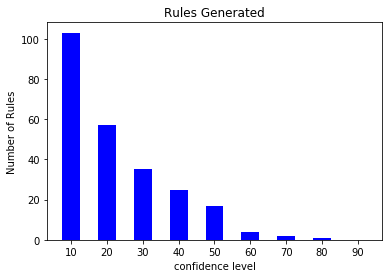

In [59]:
#6.     How many rules are generated with a support level of 0.5% and a confidence level of 90%, 80%, 70%, 60%, 50%, 40%, 30%, 20%, 10%? 
#Also visualized the generated rules.

frequent_itemsets = apriori(df2, min_support=0.005, use_colnames=True)
x=[10,20,30,40,50,60,70,80,90]
y=[]
for i in range(1,10):
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=i*0.1)
    y.append(len(rules))
    
for i in range(0,9):
    print('Rules for ',x[i],' % confidence level are ',y[i])
    
plt.bar(x, y, tick_label = x, width = 5, color = ['blue']) 
plt.xlabel('confidence level') 
plt.ylabel('Number of Rules') 
plt.title('Rules Generated') 
plt.show() 

Rules for  0.05  % confidence level are  4
Rules for  0.01  % confidence level are  44
Rules for  0.005  % confidence level are  103


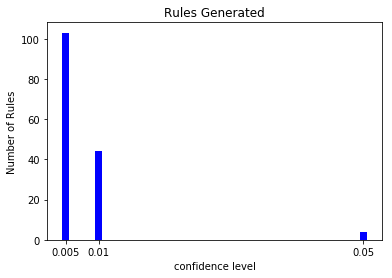

In [60]:
#7.     Analyze the results of questions 4, 5, 6 and choose the optimal threshold value for support and confidence.
#What values do you choose for support and confidence? Why?

#In above 3 ques. if confidence is 10% then highest rules are generated so we choose optimal confidence value is 10% becausethis level we got highest
#confidence level values which shows more strong relationship between differernt items set.

x=[0.05,0.01,0.005]
y=[]
for i in range(0,3):
    frequent_itemsets = apriori(df2, min_support=x[i], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
    y.append(len(rules))
      
for i in range(0,3):
    print('Rules for ',x[i],' % confidence level are ',y[i])
    

plt.bar(x, y, tick_label = x, width = 0.001, color = ['blue']) 
plt.xlabel('confidence level') 
plt.ylabel('Number of Rules') 
plt.title('Rules Generated') 
plt.show() 

#Optimal value of support level is 1% because this support level gives us more accurate rules on which we can confidently work to find out best 
#results for shop owner to give them recommendation about how to increase sales and revenue of their shop.

In [61]:
#8.     Execute the Apriori algorithm with the value of support and confidence obtained in the previous question-7 and generate the association rules. 
#Also interpret the result. 

#8.a 
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
22,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
19,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


8.b.

Interpretation for this result:

The first itemset shows the association rule "if Toast then Coffee" with support value at 0.023502 means approx. 2.4% of all transactions have this combination of Toast and Coffee bought together and also from confidence level that 70% times Coffee sales happen whenever a Toast is purchased. The lift value of 1.47<1 also shows that the purchase of Coffee is definitely affected in positive way by the purchase of Toast. The lift value of 1.47 means that Toast's purchase lifts the Coffee's purchase by 1.47 times.

From the above set of rules we can easily conclude that purchase of Toast leads to the purchase of Coffee.


Q 9 What recommendations would you give to the owner of the bakery?        

1. The owner of the bakery "The Bread Basket" should consider bundling Toast and Cofee together as a set, Also owner should trained staff in the store to cross-sell Coffee to customers who purchase Toast, knowing that they are more likely to purchase them together, thereby increasing the store's  sell and revenue.

2. The bakery place their freshly baked bread near their pastries, since customers who purchase pastries seem to be pushed by bread.

3. Product placement is very importatn in  the bakery but owner should also promote free item on sale of any quantity of products it helps in increasing the chances of another item being sold as a result of it.

4. Bread, Pastery and Coffee is a good combination product. If owner start any scheme on the combination of these product, it will help in increasing the quantity of sale.

5. There should be scheme on Hot Choclate and Coffee becuase it is a great combination and a good promotion on these two item also impact a lot on the store sale.